# Homework 1 - Part 2

**Due: Monday, September 20, 11:59 PM**

This is an individual assignment.

# Starter Code

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy.stats import linregress, probplot

## Data Set Description

In this homework will be working with the **California Housing dataset**. This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

Each record in the database describes a California house with 8 features (median income in block, median house age in block, average number of rooms, average number of bedrooms, block population, average house occupancy, house block latitude, and house block longitude).

There is a total of 20,640 samples in this dataset.

The target variable is the median house value for California districts.

In [35]:
houses = fetch_california_housing()
print(houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

## Assignment Description

The goal of this assignment is to design a **Linear Regression model with ridge regularization** that predicts the median house value using the features already provided (not need to create polynomial features).

To simplify this problem, the line below creates a ```pandas``` dataframe with all the attributes and target value:

In [36]:
df = pd.DataFrame(np.hstack((houses.data,houses.target[:,np.newaxis])),
                  columns=np.hstack((houses.feature_names,['House Value'])))
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


The training data is:

In [37]:
X = houses.data

print(X.shape)

(20640, 8)


The target labels is:

In [38]:
t = houses.target

print(t.shape)

(20640,)


Use this data to solve the following problems.

# Problem 1

In your ML experimentation, consider the coefficient of determination, $r^2$, as your evaluation metric. In a paragraph, describe the experimental design you will conduct to find a model that best fits the data *well* and is able to generalize.

* Include which parameter/s you will have control and experiment with.
* Define the general steps you will follow to train a model and draw conclusions from.

The provided dataset is already described in the feature space. In particular, each house is described as a function of 8 features. Assuming we will use all 8 features, our model order will then be (the number of selected features).

We still need to determine the value for the unknown parameter for the ridge regularization term. These are the parameters we will control and determine the best values for by using k-fold cross-validation.

**General steps to train model and draw conclusions**
1. Collect the data.
2. Partition data into training and test sets.
3. Design experimental design, which includes performing cross-validation on model parameters. In this case,define a set of values for that will be tested.
4. Use the select parameter values to retrain a model using the entire training set.
5. Predict target value for test set samples, and report results on test set.

# Problem 2

Implement a **linear regression model with ridge regularization** (do NOT use library functions for this). Be sure to follow all the experimental design sets including:

* scale the features. Use the standardization scaling which uses the formula:
$$\hat{f}_i = \frac{f_i-\mu_{f_i}}{\sigma_{f_i}}$$
where $\mu_{f_i}$ and $\sigma_{f_i}$ are the mean and standard deviation of feature $f_i$, respectively. You may use the function [```StandardScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* partitioning the data into training and test
* using 10-fold cross-validation to find the best set of parameter/s
* train the final model
* evaluate performance in the test set
* draw conclusions

You should **not** use built-in functions to implement linear regression or cross-validation. But you can use help functions such as [```train_test_split```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the data, [```linregress```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) to compute the coefficient of determination and [```KFold```](https://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.KFold.html) to split the training set in k-folds.

In [39]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
House Value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [40]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
Xnorm=scaler.fit_transform(X)

In [41]:
X_train, X_test, t_train, t_test = train_test_split(Xnorm, t, test_size=0.2, random_state=42)

In [42]:
def Regression(X,t):
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def Regression_test(X,w):
    y = X@w
    return y

def Ridge_Regression(X,t,lam):
    N,M=np.shape(X)
    w = np.linalg.inv(X.T@X + lam*np.eye(M))@X.T@t
    y = X@w
    error = t-y
    return w, y, error

In [43]:
w,y_train,_=Ridge_Regression(X_train,t_train,0.01)

In [ ]:
# 10-fold cross validation to find the best lambda value
kf = KFold(n_splits=10)
lam_vals = np.arange(0,10,0.01)
max_r2 = 0
lam_best = 0
r2_val_store=[]
r2_train_store=[]

for lam in lam_vals:
    r2_val = 0
    r2_train = 0
    print('Lambda = ',lam)
    f=1
    for train_index, validation_index in kf.split(X_train):
        print('Fold ',f)
        x_train2, x_validation = X_train[train_index], X_train[validation_index]
        t_train2, t_validation = t_train[train_index], t_train[validation_index]
        w, pred_train, etrain = Ridge_Regression(x_train2, t_train2, lam)
        pred_val = Regression_test(x_validation, w)
        _,LR_train = probplot(t_train2-pred_train);
        r2_train+=LR_train[2]**2
        _,LR_val = probplot(t_validation-pred_val);
        r2_val+=LR_val[2]**2
        print('R-squared Training = ',LR_train[2]**2)
        print('R-squared Validation = ',LR_val[2]**2)
        print('-----------------------------------------------------')
        f+=1
    r2_val_store+=[r2_val/10]
    r2_train_store+=[r2_train/10]
    print('Average Training = ', r2_train/10, '\n Average Validation = ', r2_val/10)
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    if r2_val > max_r2:
        lam_best = lam
        max_r2 = r2_val

print('The lambda chosen is ' + str(lam_best) + ', with an average r2 score of ' + str(max_r2 / 10))

In [45]:
print('The lambda chosen is ' + str(lam_best) + ', with an average r2 score of ' + str(max_r2 / 10))

The lambda chosen is 0.001, with an average r2 score of 0.9244813129501346


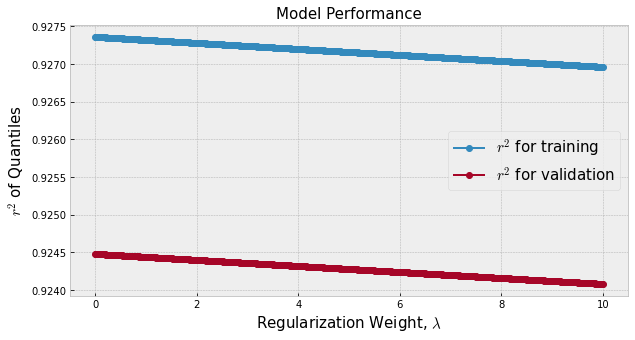

In [46]:
plt.figure(figsize=(10,5))
plt.plot(lam_vals,r2_train_store,'-o',label='$r^2$ for training')
plt.plot(lam_vals,r2_val_store,'-o',label='$r^2$ for validation')
plt.legend(fontsize=15)
plt.xlabel('Regularization Weight, $\lambda$',size=15)
plt.ylabel('$r^2$ of Quantiles',size=15)
plt.title('Model Performance',size=15);

# Problem 3

Discuss model performance, advantages and limitations.

Let's retrain the final model using the entire training data:

In [47]:
w_final,pred_train,_ = Ridge_Regression(X_train,t_train,lam_best)

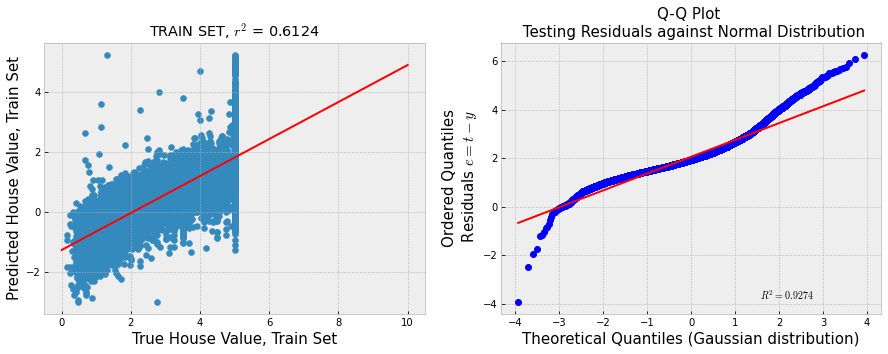

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
m,b,_,_,_=linregress(t_train,pred_train)
plt.plot(np.linspace(0,10,100),np.linspace(0,10,100)*m+b,'r')
plt.scatter(t_train,pred_train)
plt.xlabel('True House Value, Train Set',fontsize=15)
plt.ylabel('Predicted House Value, Train Set',fontsize=15)
plt.title('TRAIN SET, $r^2$ = '+
          str(np.round(linregress(t_train,pred_train)[2]**2,4)));

plt.subplot(1,2,2)
probplot(t_train-pred_train, plot=plt, rvalue=True)
plt.title('Q-Q Plot \n Testing Residuals against Normal Distribution',size=15)
plt.xlabel('Theoretical Quantiles (Gaussian distribution)',size=15)
plt.ylabel('Ordered Quantiles\n Residuals $e=t-y$',size=15);

And now evaluate performance on the test set:

In [50]:
pred_test = Regression_test(X_test, w_final)

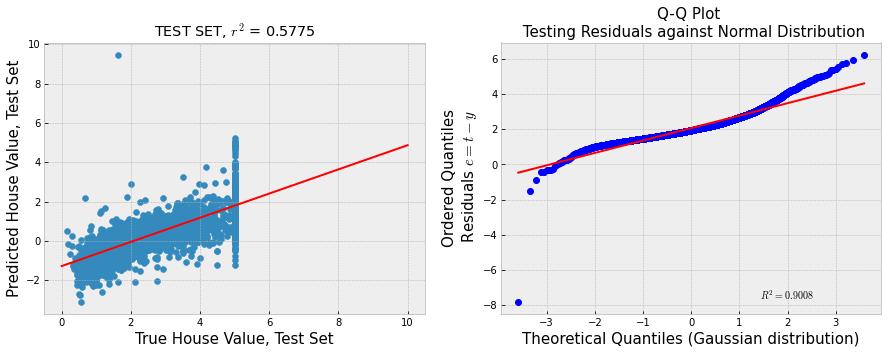

In [52]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
m,b,_,_,_=linregress(t_test,pred_test)
plt.plot(np.linspace(0,10,100),np.linspace(0,10,100)*m+b,'r')
plt.scatter(t_test,pred_test)
plt.xlabel('True House Value, Test Set',fontsize=15)
plt.ylabel('Predicted House Value, Test Set',fontsize=15)
plt.title('TEST SET, $r^2$ = '+
          str(np.round(linregress(t_test,pred_test)[2]**2,4)))

plt.subplot(1,2,2)
probplot(t_test-pred_test, plot=plt, rvalue=True)
plt.title('Q-Q Plot \n Testing Residuals against Normal Distribution',size=15)
plt.xlabel('Theoretical Quantiles (Gaussian distribution)',size=15)
plt.ylabel('Ordered Quantiles\n Residuals $e=t-y$',size=15);

During training, the r2-score for the residual quantiles is approximately 92.74% and the r2-score for the residual quantiles in the testing stage is approximately 90.08%. This suggests that overfitting may have occurred.

Moreover, the overall performance is much less than the desired $r^2>>99\%$. This is visually seen in the Q-Q plots: the tails of the distribution do now fit the normality assumption for the residuals very well. This model architecture (linear regression) may be too simple, and some features are not uncorrelated, which carry redundant and noisy data into the model potentially deteriorating it.